Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[ 102.25970627  110.6814506   105.65608183 ...,  116.3608302   126.4366062
   128.41959347]
 [  98.51063809  102.61767496  110.42984207 ...,  105.39415768
   105.89450351  118.34082702]
 [ 119.54124033  112.36945584  116.32673897 ...,  107.04536945
   116.31975236   90.70571221]
 ..., 
 [ 101.44011706  101.88173985  109.75431465 ...,   39.45423061
    52.01450889   41.21179675]
 [  99.24162433  112.24039198  116.15257705 ...,   46.4075909    44.78987643
    33.73825545]
 [ 106.74080524  109.83419361  120.65673991 ...,   50.30943951
    48.52358226   50.86055529]]


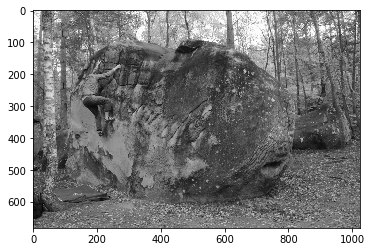

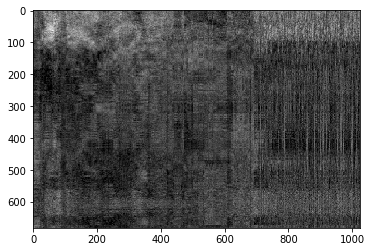

In [52]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import eig
import image_analysis as ima
from numpy.linalg import multi_dot

def matrix_to_image(input_matrix):
    """
    """
    dummy_image = np.ones((input_matrix.shape[0],input_matrix.shape[1],3))/256
    matrix_reshaped = np.asarray(input_matrix[:,:,np.newaxis])   #Reshape the values from a 2D Array to an ndarray
    image = matrix_reshaped*dummy_image
    
    return(image)

image = plt.imread('Boulder_image.jpg')

A, gray_image = ima.rgb_to_gray(image)
W = np.dot(A,A.transpose())
Wv = np.dot(A.transpose(),A)

W_eigenvalues, U = eig(W)
Wv_eigenvalues, V = eig(Wv)

S_entries = np.sqrt(W_eigenvalues)
S_entries = S_entries/np.max(S_entries)
S_entries_sorted = np.flip(np.sort(S_entries), axis=0)
sorting_indices_S = np.flip(np.argsort(S_entries), axis=0)
S = np.zeros_like(A)
np.fill_diagonal(S,S_entries_sorted)

U_sorted = U[sorting_indices_S]

sorting_indices_V = np.flip(np.argsort(np.sqrt(Wv_eigenvalues)),axis=0)
V_sorted = V[sorting_indices_V]

SVD_tmp = np.dot(U_sorted, S)
SVD = np.dot(SVD_tmp,V_sorted.transpose())
SVD = np.real(SVD)
SVD = 255*SVD/np.max(SVD) #something is going wrong in the mathematics -- the pixel values are much too small

resulting_image = matrix_to_image(SVD)
plt.figure(1)
plt.imshow(gray_image)
plt.figure(2)
plt.imshow(resulting_image)

print(SVD)
